<a href="https://colab.research.google.com/github/Ahmad-Nedal/TH2/blob/main/visit1_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STRATIFIES K-FOLD CROSS VALIDATION
%matplotlib inline
import numpy as num
import pandas as pd
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
from google.colab import drive
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plot

In [2]:
# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/thesis2/606_Full.csv", index_col=0, parse_dates=True)  
#df = pd.read_csv('https://raw.githubusercontent.com/Ahmad-Nedal/TH2/main/DTI-606.csv')
df = pd.read_csv('https://raw.githubusercontent.com/Ahmad-Nedal/TH2/main/243_first_visit_Full.csv')
df.head()

,Unnamed: 0,RID,EXAMDATE,Diagnosis,AGE,PTGENDER,FA_CST_L_DTIROI_04_30_14,FA_CST_R_DTIROI_04_30_14,FA_ICP_L_DTIROI_04_30_14,FA_ICP_R_DTIROI_04_30_14,...,AD_SCC_R_DTIROI_04_30_14,AD_RLIC_L_DTIROI_04_30_14,AD_RLIC_R_DTIROI_04_30_14,AD_TAP_L_DTIROI_04_30_14,AD_TAP_R_DTIROI_04_30_14,AD_SUMGCC_DTIROI_04_30_14,AD_SUMBCC_DTIROI_04_30_14,AD_SUMSCC_DTIROI_04_30_14,AD_SUMCC_DTIROI_04_30_14,AD_SUMFX_DTIROI_04_30_14
0,2,123,3/21/2013,2,80.401092,1,0.355740,0.336685,0.271300,0.303025,...,0.001780,0.001257,0.001170,0.002719,0.002392,0.001706,0.002025,0.001841,0.001873,0.002873
1,3,778,9/4/2013,3,79.367217,1,0.270231,0.354589,0.289374,0.296236,...,0.001794,0.001301,0.001313,0.002684,0.002336,0.001798,0.002145,0.001938,0.001985,0.003776
2,4,908,1/6/2014,2,70.121308,2,0.376158,0.390559,0.334983,0.329103,...,0.001718,0.001276,0.001262,0.002667,0.002125,0.001765,0.002238,0.001937,0.002022,0.002988
3,5,934,10/22/2013,1,76.978142,2,0.392770,0.408736,0.313411,0.298232,...,0.001601,0.001297,0.001215,0.002041,0.002022,0.001667,0.001874,0.001617,0.001717,0.002768
4,6,2007,7/6/2010,2,83.400000,2,0.380674,0.374772,0.343332,0.357956,...,0.002028,0.001394,0.001472,0.002873,0.002909,0.001804,0.002211,0.002130,0.002086,0.003499


In [3]:
x = df.iloc[:, 4:].values
y = df.iloc[:, 3].values

In [4]:
x[0][0] , y[0]

(80.40109167, 2)

In [5]:
labels, counts = num.unique(y, return_counts=True)
print(labels, counts)

[1 2 3] [ 84 113  46]


In [6]:
#Encoding Categorical Data
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [7]:
# Create classifier object.
lr = LogisticRegressionCV(cv=None, random_state=0, solver= 'liblinear', class_weight= 'balanced',)

In [8]:
# Create StratifiedKFold object.

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Imputer = SimpleImputer(missing_values=num.nan, strategy='mean')
StSc = StandardScaler()

lst_accu_stratified = []
predicted_targets = num.array([])
actual_targets = num.array([])

for train_index, test_index in skf.split(x, y):
	x_train_fold, x_test_fold = x[train_index], x[test_index]
	y_train_fold, y_test_fold = y[train_index], y[test_index]

	x_train_imputed = Imputer.fit_transform(x_train_fold)
	x_train_scaled = StSc.fit_transform(x_train_imputed)
 
	#x_test_imputed = SimpleImputer(missing_values=num.nan, strategy='mean').fit(x_test_fold).transform(x_test_fold)
	#x_test_scaled = StandardScaler().fit(x_test_imputed).transform(x_test_imputed)

	x_test_imputed = Imputer.transform(x_test_fold)
	x_test_scaled = StSc.transform(x_test_imputed)
 	##
	classifiers=lr.fit(x_train_scaled, y_train_fold)
	predicted_labels = classifiers.predict(x_test_scaled)
	predicted_targets = num.append(predicted_targets, predicted_labels)
	actual_targets = num.append(actual_targets, y_test_fold)
 
	#balanced_accuracy_score(y_true, y_pred)
	lst_accu_stratified.append(balanced_accuracy_score(predicted_targets, actual_targets))

In [9]:
#balanced_accuracy_score(y_true, y_pred)

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


List of possible accuracy: [0.38650793650793647, 0.38591289236450527, 0.45065101139269936, 0.47158407348125825, 0.48505180519421237]

Maximum Accuracy That can be obtained from this model is: 48.50518051942124 %

Minimum Accuracy: 38.59128923645053 %

Overall Accuracy: 43.594154378812235 %

Standard Deviation is: 0.047024258706299935


Normalized confusion matrix


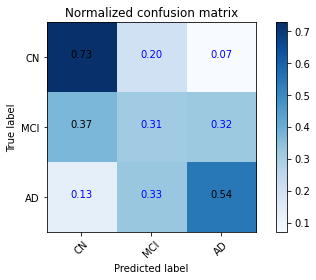

In [10]:
classnames = num.array(['CN', 'MCI', 'AD'], dtype='<U10')
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    num.set_printoptions(precision=2)

   
    plot.figure()
    generate_confusion_matrix(cnf_matrix, classes=classnames, normalize=True, title='Normalized confusion matrix')
    plot.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, num.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plot.imshow(cnf_matrix, interpolation='nearest', cmap=plot.get_cmap('Blues'))
    plot.title(title)
    plot.colorbar()

    tick_marks = num.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.


    for i in range (cnf_matrix.shape[0]):
        for j in range (cnf_matrix.shape[1]):
          plot.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                    color="black" if cnf_matrix[i, j] > thresh else "blue")
          plot.tight_layout()
          plot.ylabel('True label')
          plot.xlabel('Predicted label')

    return cnf_matrix
plot_confusion_matrix(predicted_targets, actual_targets)